# Script contents:
## 1. Importing libraries
## 2. Creating Regions
## 3. Crosstab
## 4. Exclusion flag for low activity customers
## 5. Customer profiling
## 6. Visualizations and crosstabs

# Importing libraries and dataframe

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
path=r'C:\Users\akul_\OneDrive\Documents\Tarishi\CF Data analysis bootcamp\Achievement 4-Python\Instacart Basket Analysis'

In [4]:
# Importing dataframe
df_merged_final=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_customers_all.pkl'))

In [5]:
df_merged_final.head()

,order_id,user_id,no_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency,First Name,Last name,Gender,State,Age,n_dependants,fam_status,income,merge_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


## The first name and last name columns are Personally Identifiable Information or PII data, hence they can be removed from the dataframe.

In [6]:
## Dropping first name and last name columns
df_merged_final=df_merged_final.drop(columns=['First Name','Last name'])

In [7]:
df_merged_final.head()

,order_id,user_id,no_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,spending_flag,median_orders,order_frequency,Gender,State,Age,n_dependants,fam_status,income,merge_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both


## Creating regions column


In [8]:
##create a list assigning state names to the regions
Region1=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [9]:
Region2=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [10]:
Region3=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee',
'Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [11]:
Region4=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [12]:
## creating a new column
df_merged_final.loc[df_merged_final['State'].isin(Region1), 'Region']='Northeast'

In [13]:
df_merged_final.loc[df_merged_final['State'].isin(Region2), 'Region']='Midwest'

In [14]:
df_merged_final.loc[df_merged_final['State'].isin(Region3), 'Region']='South'

In [15]:
df_merged_final.loc[df_merged_final['State'].isin(Region4), 'Region']='West'

In [16]:
df_merged_final['Region'].value_counts()

Region
South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: count, dtype: int64

## Creating a crosstab

In [17]:
cross_tab=pd.crosstab(df_merged_final['Region'],df_merged_final['spending_flag'])

In [18]:
cross_tab


spending_flag,High spender,Low spender
Region,,
Midwest,149817,7027107
Northeast,101420,5320605
South,196523,10002459
West,147803,7684007


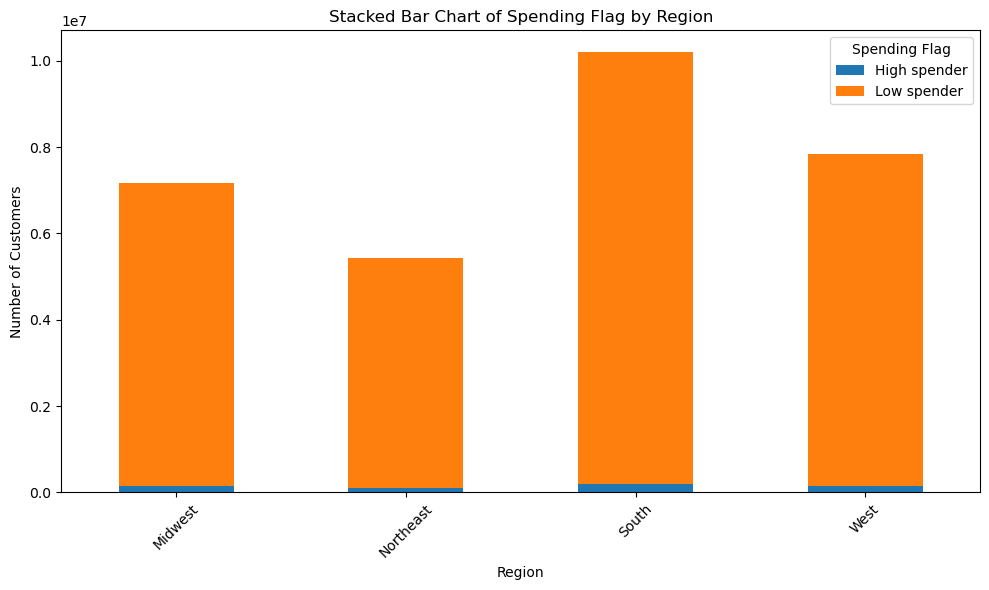

In [19]:
plot=cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Chart of Spending Flag by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Flag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
## export as an image
plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending.png'))

## Low activity customers


In [21]:
df_merged_final['exclusion_flag']=df_merged_final['no_of_orders']<5

In [22]:
df_merged_final.head()

,order_id,user_id,no_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency,Gender,State,Age,n_dependants,fam_status,income,merge_flag,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,True
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,True
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,True
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,True
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,True


In [23]:
df_merged_final['exclusion_flag'].value_counts()

exclusion_flag
False    23076100
True      7553641
Name: count, dtype: int64

In [24]:
## final dataset with customers more than 5 orders
df_merged_final = df_merged_final[df_merged_final['exclusion_flag'] == False]

In [25]:
## export the exclusion flag sample
excluded=df_merged_final[df_merged_final['exclusion_flag']]

In [26]:
excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_below_5.pkl'))

## Customer Profiling

In [27]:
df_merged_final

,order_id,user_id,no_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency,Gender,State,Age,n_dependants,fam_status,income,merge_flag,Region,exclusion_flag
21,431534,1,5,4,15,28.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False
22,431534,1,5,4,15,28.0,12427,2,1,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False
23,431534,1,5,4,15,28.0,10258,3,1,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False
24,431534,1,5,4,15,28.0,25133,4,1,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False
25,431534,1,5,4,15,28.0,10326,5,0,both,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629736,2977660,206209,13,1,12,7.0,14197,5,1,both,...,Non-frequent customer,Female,Iowa,74,3,married,137969,both,Midwest,False
30629737,2977660,206209,13,1,12,7.0,38730,6,0,both,...,Non-frequent customer,Female,Iowa,74,3,married,137969,both,Midwest,False
30629738,2977660,206209,13,1,12,7.0,31477,7,0,both,...,Non-frequent customer,Female,Iowa,74,3,married,137969,both,Midwest,False
30629739,2977660,206209,13,1,12,7.0,6567,8,0,both,...,Non-frequent customer,Female,Iowa,74,3,married,137969,both,Midwest,False


In [28]:
#importing department dataframe 
df_dept=pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'departments_wrangled.csv'))

In [29]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Assign a function to create customer profile

In [30]:
def assign_profile(row):
    Age = row['Age']
    income = row['income']
    n_dependants = row['n_dependants']
    order_hour_of_day = row['order_hour_of_day']
    orders_day_of_week = row['orders_day_of_week']

    if Age < 30 and income < 50000 and n_dependants == 0 and order_hour_of_day >= 20:
       return 'Young Single'
    elif 25 <= Age <= 40 and income < 70000 and n_dependants >= 1 and  order_hour_of_day <= 11:
       return 'Young Parent'
    elif 30 <= Age <= 45 and 70000 <= income <= 120000 and n_dependants <= 1 and 9 <= order_hour_of_day <= 17:
       return 'Busy Professional'
    elif 35 <= Age <= 60 and income > 60000 and n_dependants >= 2 and orders_day_of_week in [0, 6]:
       return 'Family Shopper'
    elif Age > 60 and income < 80000  and order_hour_of_day < 10:
        return 'Senior'
    else:
        return 'Other'

In [31]:
df_merged_final['customer_profile'] = df_merged_final.apply(assign_profile, axis=1)

In [32]:
df_merged_final['customer_profile'].value_counts()

customer_profile
Other                19785411
Family Shopper        1302215
Busy Professional      916966
Young Parent           816334
Senior                 243369
Young Single            11805
Name: count, dtype: int64

In [33]:
df_merged_final['customer_profile'].isna().sum()

0

## Crosstabs

In [34]:
## crosstab department id and customer profile
crosstab = pd.crosstab(df_merged_final['customer_profile'], df_merged_final['department_id'], dropna = False)

In [35]:
crosstab

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Busy Professional,60661,973,34161,278226,4557,8223,74344,2466,24792,1020,...,20937,52177,18194,31145,156894,19368,12455,71911,29883,2184
Family Shopper,90828,1335,47501,410092,3833,11611,90900,4110,37817,1303,...,32925,75523,25311,48033,217030,26561,19113,94955,42605,3178
Other,1324397,22083,716526,5840145,90819,159572,1656884,58969,513602,22302,...,423795,1123829,424913,635156,3339929,437946,271907,1776103,634395,46765
Senior,13675,238,7797,65754,753,1507,26427,548,4427,369,...,2938,11522,6729,5435,39318,5992,2655,36454,7069,494
Young Parent,48246,800,28772,237699,3091,6165,74772,2019,18726,999,...,15432,44170,19434,24650,137602,18348,10832,86676,25683,1824
Young Single,834,17,421,3028,18,123,1185,39,260,11,...,128,652,268,330,2028,295,164,1371,408,28


In [36]:
print(df_merged_final.columns)

Index(['order_id', 'user_id', 'no_of_orders', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Busiest day', 'Busiest days',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_orders', 'order_frequency', 'Gender', 'State',
       'Age', 'n_dependants', 'fam_status', 'income', 'merge_flag', 'Region',
       'exclusion_flag', 'customer_profile'],
      dtype='object')


In [37]:
## cross tab customer_profile and spending_flag
crosstab1 = pd.crosstab(
    index=df_merged_final['customer_profile'],
    columns=[df_merged_final['spending_flag'], df_merged_final['fam_status']]
)


In [38]:
crosstab1

spending_flag         High spender                                           \
fam_status        divorced/widowed living with parents and siblings married   
customer_profile                                                              
Busy Professional                0                                0    3997   
Family Shopper                   0                                0   28041   
Other                        38935                            21681  284067   
Senior                          16                                0     247   
Young Parent                     0                                0    2678   
Young Single                     0                                0       0   

spending_flag                 Low spender                                   \
fam_status        single divorced/widowed living with parents and siblings   
customer_profile                                                             
Busy Professional   2853                0                                0   
Family Shopper         0                0                                0   
Other              69970          1884222                          1089964   
Senior                 0            61388                                0   
Young Parent           0                0                                0   
Young Single           8                0                                0   

spending_flag                         
fam_status          married   single  
customer_profile                      
Busy Professional    464810   445306  
Family Shopper      1274174        0  
Other              13144297  3252275  
Senior               181718        0  
Young Parent         813656        0  
Young Single              0    11797

In [39]:
# Count of each customer profile
profile_counts = df_merged_final['customer_profile'].value_counts()

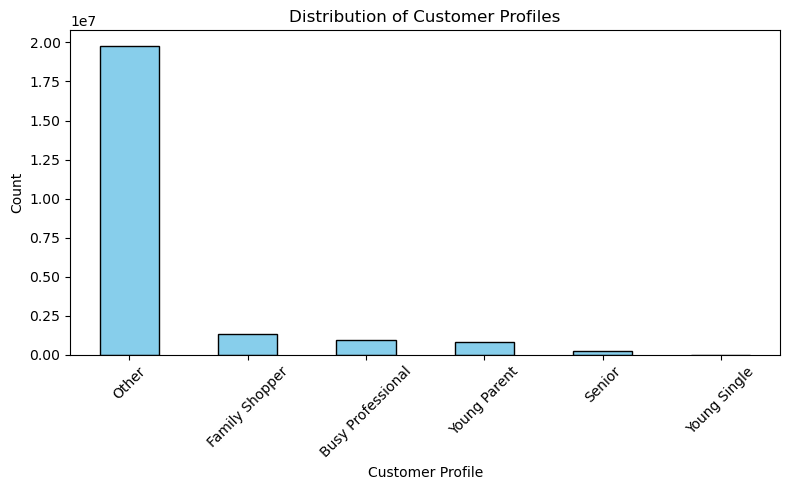

In [40]:
# Plot
plt.figure(figsize=(8, 5))
profile_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Aggregate function

In [41]:
agg_result = df_merged_final.groupby('customer_profile')[['no_of_orders', 'prices']].agg(['max','mean', 'min'])

In [42]:
agg_result

no_of_orders                prices               
                           max       mean min    max      mean  min
customer_profile                                                   
Busy Professional           99  22.203458   5   25.0  7.958337  1.0
Family Shopper              99  21.063382   5   25.0  7.973963  1.0
Other                       99  21.933315   5   25.0  7.790240  1.0
Senior                      99  22.457067   5   25.0  6.972452  1.0
Young Parent                99  22.706635   5   25.0  7.608660  1.0
Young Single                99  19.370860   5   25.0  7.058611  1.0

In [43]:
## crosstab between region and customer profile
region_crosstab = pd.crosstab(df_merged_final['customer_profile'], df_merged_final['Region'], normalize='index')
print(region_crosstab)

Region              Midwest  Northeast     South      West
customer_profile                                          
Busy Professional  0.235942   0.173408  0.337589  0.253061
Family Shopper     0.232923   0.176603  0.335864  0.254610
Other              0.233758   0.177483  0.332456  0.256303
Senior             0.222247   0.183770  0.341403  0.252579
Young Parent       0.236645   0.173776  0.332107  0.257473
Young Single       0.267006   0.204066  0.293604  0.235324


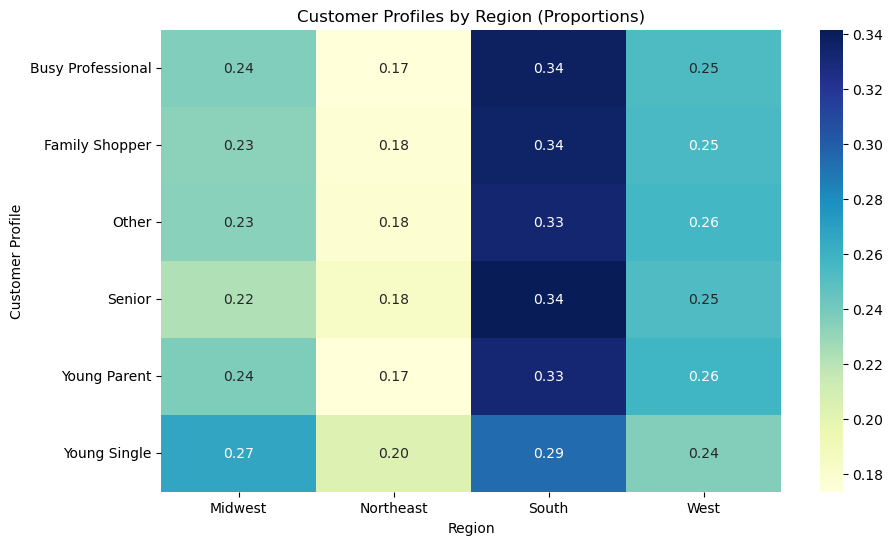

In [44]:
## heatmap
# Region
plt.figure(figsize=(10, 6))
sns.heatmap(region_crosstab, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Customer Profiles by Region (Proportions)')
plt.xlabel('Region')
plt.ylabel('Customer Profile')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_by_region.png'), dpi=300, bbox_inches='tight')
plt.show()

In [45]:
## crosstab between department and customer profile
dept_crosstab = pd.crosstab(df_merged_final['customer_profile'], df_merged_final['department_id'], normalize='index')
print(dept_crosstab)

department_id            1         2         3         4         5         6   \
customer_profile                                                                
Busy Professional  0.066154  0.001061  0.037254  0.303420  0.004970  0.008968   
Family Shopper     0.069749  0.001025  0.036477  0.314919  0.002943  0.008916   
Other              0.066938  0.001116  0.036215  0.295174  0.004590  0.008065   
Senior             0.056190  0.000978  0.032038  0.270182  0.003094  0.006192   
Young Parent       0.059101  0.000980  0.035245  0.291179  0.003786  0.007552   
Young Single       0.070648  0.001440  0.035663  0.256501  0.001525  0.010419   

department_id            7         8         9         10  ...        12  \
customer_profile                                           ...             
Busy Professional  0.081076  0.002689  0.027037  0.001112  ...  0.022833   
Family Shopper     0.069804  0.003156  0.029041  0.001001  ...  0.025284   
Other              0.083743  0.002980  0.025959

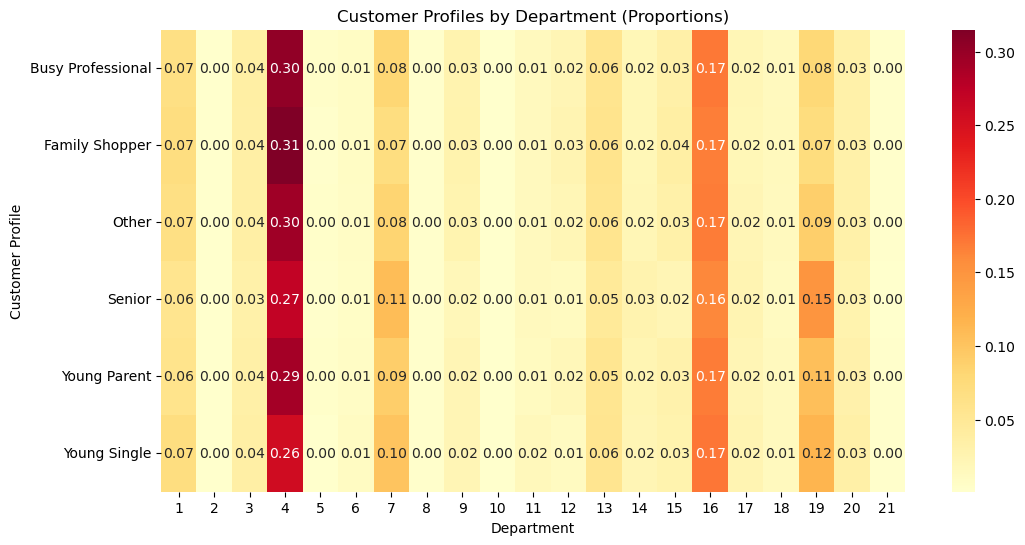

In [46]:
## heatmap
# Department
plt.figure(figsize=(12, 6))
sns.heatmap(dept_crosstab, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Customer Profiles by Department (Proportions)')
plt.xlabel('Department')
plt.ylabel('Customer Profile')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_by_department.png'), dpi=300, bbox_inches='tight')
plt.show()

In [47]:
# export the dataframe
df_merged_final.to_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_customers_all.pkl'))